In [88]:
import numpy as np

In [89]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

In [90]:
# Importo modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [91]:
from sklearn.model_selection import train_test_split
from soluciones_helper import plot_boundaries, get_polynimial_set
import matplotlib.pyplot as plt

# 1. Naive Bayes Gaussiano

Test Accuracy (Exactitud): 0.627118644068
Train Accuracy (Exactitud): 0.694915254237
Naive Bayes


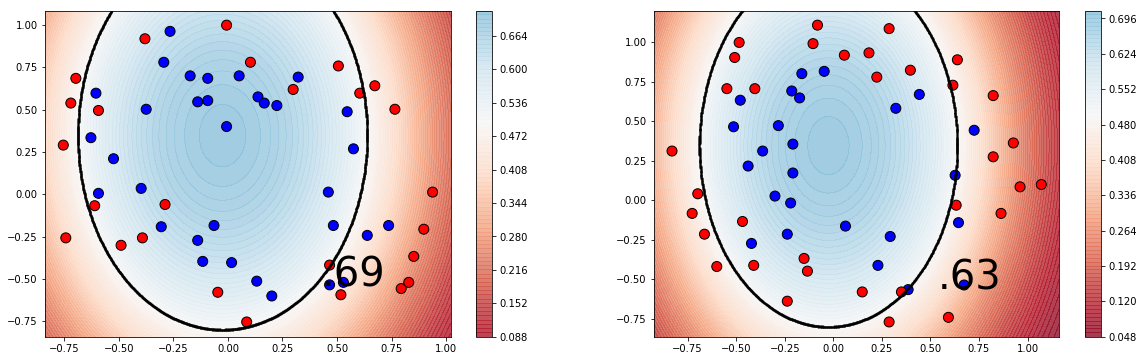

In [92]:
# Defino el modelo de clasificación como Naive Bayes Gaussiano
clf_bayes = GaussianNB()
# Entreno el modelo con el dataset de entrenamiento
clf_bayes.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_bayes = clf_bayes.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_bayes = clf_bayes.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_bayes)
print('Train Accuracy (Exactitud):',score_train_bayes)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_bayes, clf_bayes.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_bayes, clf_bayes.predict_proba, ax=ax2)
print('Naive Bayes')
plt.show()

In [98]:
print('Medias: n_clases x n_features')
print(clf_bayes.theta_)
print('Varianzas: n_clases x n_features')
print(clf_bayes.sigma_)

Medias: n_clases x n_features
[[ 0.10023052  0.11111008]
 [ 0.02648005  0.17789639]]
Varianzas: n_clases x n_features
[[ 0.35398599  0.29326577]
 [ 0.14559191  0.21007696]]


# 2. Regresion logistica

In [114]:
def get_regions(degree = 2, lambd = 0, plot_it = True, print_it = False):
    X_train_degree = get_polynimial_set(X_train, degree=degree)
    X_test_degree = get_polynimial_set(X_test, degree=degree)
    # Defino el modelo de clasificación como Regresion Logistica
    if lambd == 0:
        C1 = 10000000000
    else:
        C1 = 1/lambd 
    #C2 = 1
    clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

    # Entreno el modelo con el dataset de entrenamiento
    clf_logist_pol.fit(X_train_degree, y_train)

    # Calculo el score (Exactitud) con el dataset de testeo
    score_test_logist_pol = clf_logist_pol.score(X_test_degree, y_test)

    # Calculo tambien el score del dataset de entrenamiento para comparar
    score_train_logist_pol = clf_logist_pol.score(X_train_degree, y_train)

    # print('Test Accuracy (Exactitud):',score_test_logist_pol)
    # print('Train Accuracy (Exactitud):',score_train_logist_pol)
    # print('coeficientes:', clf_logist_pol.coef_)
    # print('intercept:', clf_logist_pol.intercept_)
    if plot_it:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
        plot_boundaries(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1)
        plot_boundaries(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2)
        print('Regresion Logistica Polinomial de orden '+str(degree) +', con lamdba (regularización L2):' +  str(lambd))
        plt.show()
    if print_it:
        print('Train Accuracy (Exactitud):',score_train_logist_pol)
        print('Test Accuracy (Exactitud):',score_test_logist_pol)
    return score_train_logist_pol, score_test_logist_pol, clf_logist_pol.coef_

In [117]:
def test_options(options, plot_it=False):
    train_acc_array = []
    test_acc_array = []
    degrees = []
    lambdas = []
    coefs_array_mean = []
    coefs_array_std = []
    for opt in options:
        tr_acc, ts_acc, coefs = get_regions(degree = opt['degree'], lambd = opt['lambd'], plot_it=plot_it)
        train_acc_array.append(tr_acc)
        test_acc_array.append(ts_acc)
        degrees.append(opt['degree'])
        lambdas.append(opt['lambd'])
        coefs_array_mean.append(coefs.mean())
        coefs_array_std.append(coefs.std())
    return degrees, lambdas, train_acc_array, test_acc_array, coefs_array_mean, coefs_array_std

## 2.1 Variando grado de polinomio

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


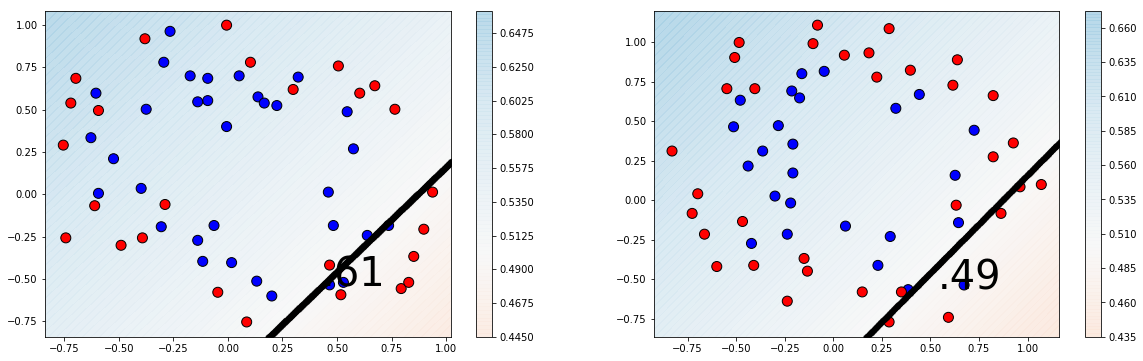

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


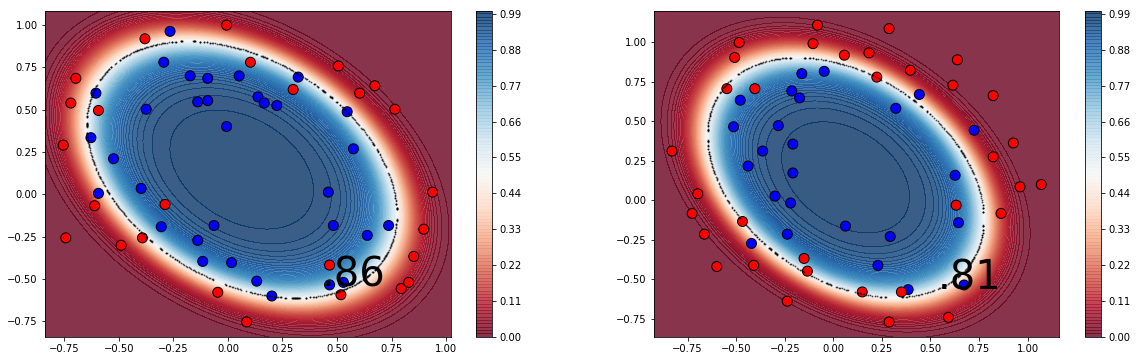

Regresion Logistica Polinomial de orden 3, con lamdba (regularización L2):0


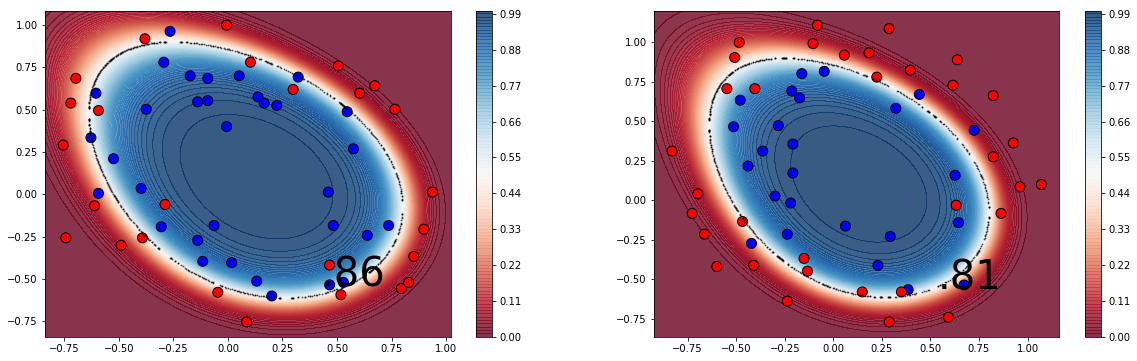

Regresion Logistica Polinomial de orden 4, con lamdba (regularización L2):0


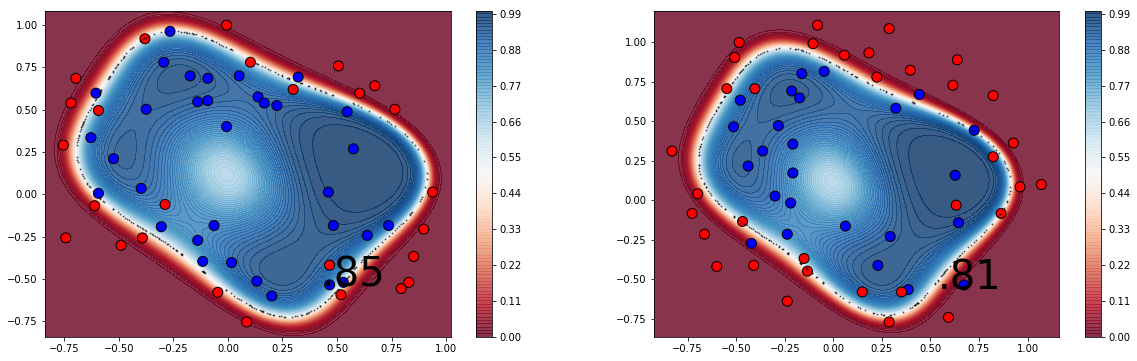

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 5, con lamdba (regularización L2):0


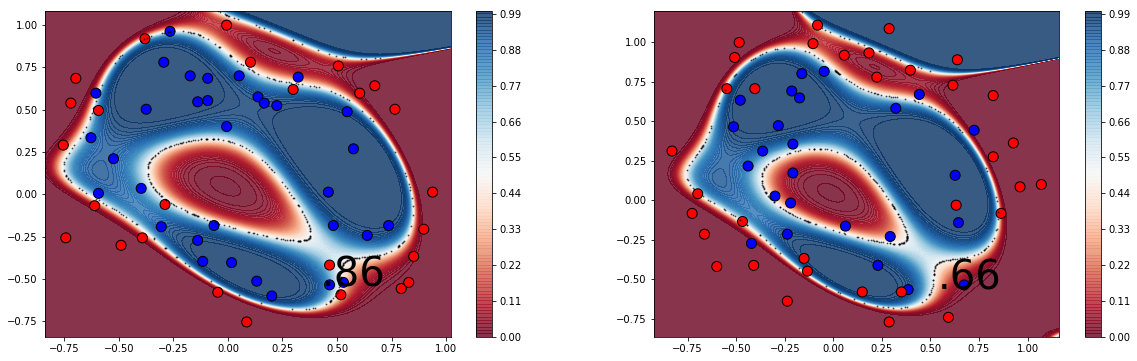

Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


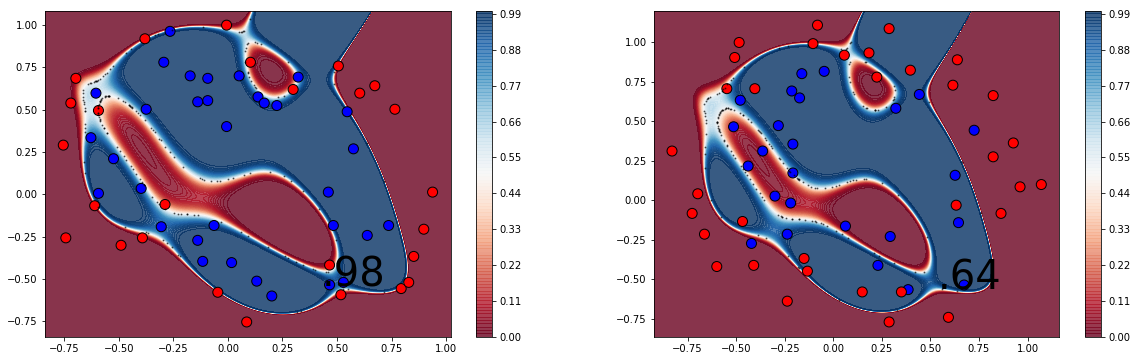

Regresion Logistica Polinomial de orden 7, con lamdba (regularización L2):0


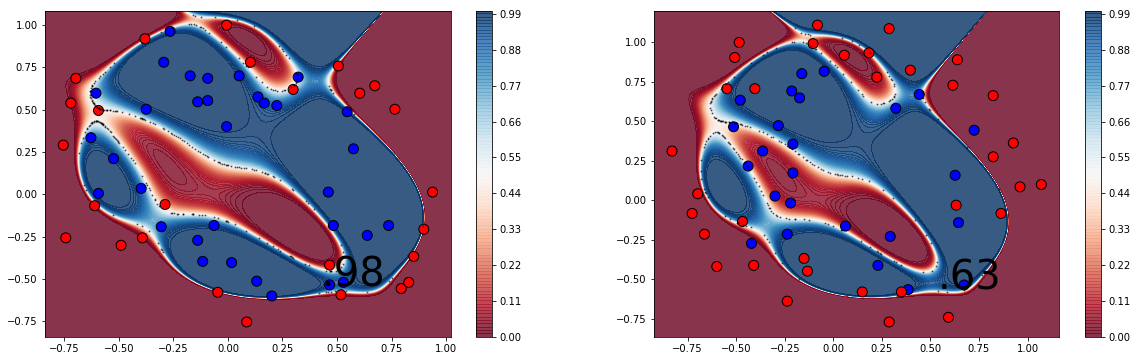

Regresion Logistica Polinomial de orden 8, con lamdba (regularización L2):0


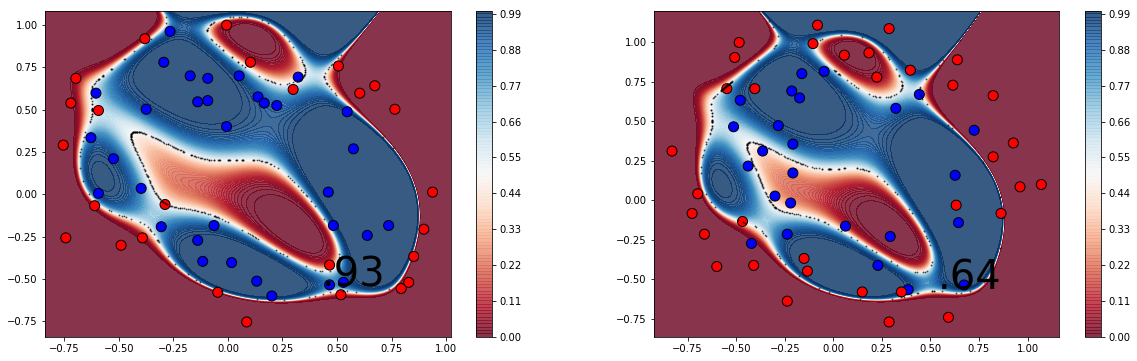

Regresion Logistica Polinomial de orden 9, con lamdba (regularización L2):0


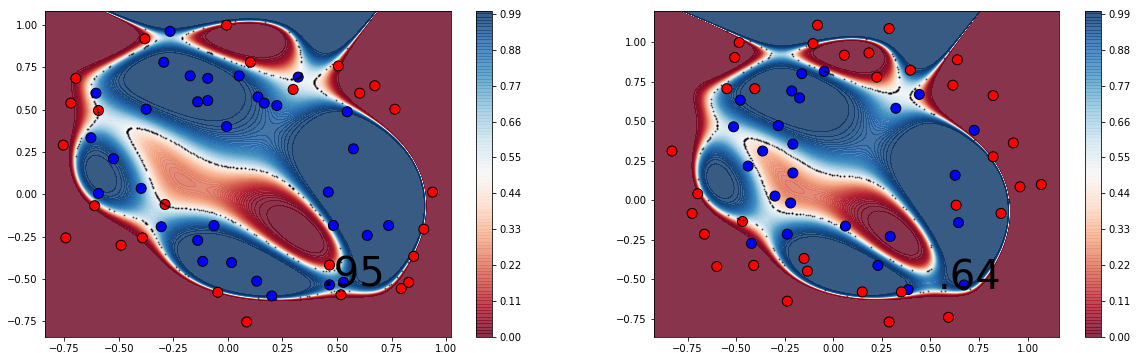

Regresion Logistica Polinomial de orden 10, con lamdba (regularización L2):0


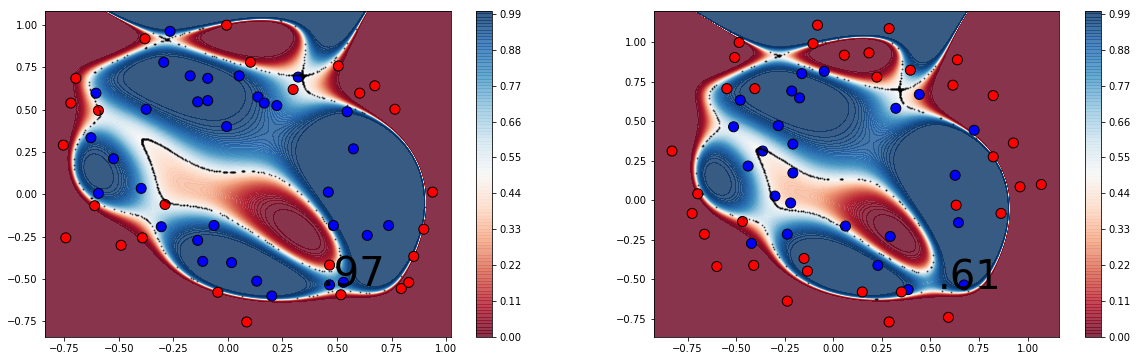

Regresion Logistica Polinomial de orden 11, con lamdba (regularización L2):0


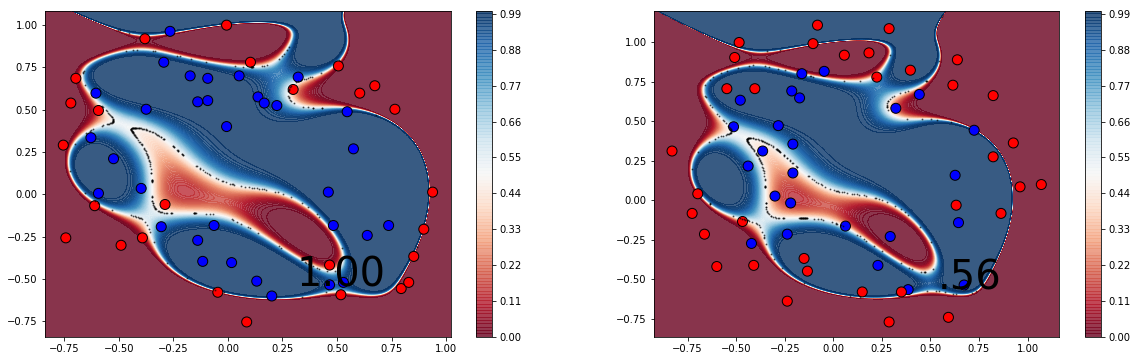

Regresion Logistica Polinomial de orden 12, con lamdba (regularización L2):0


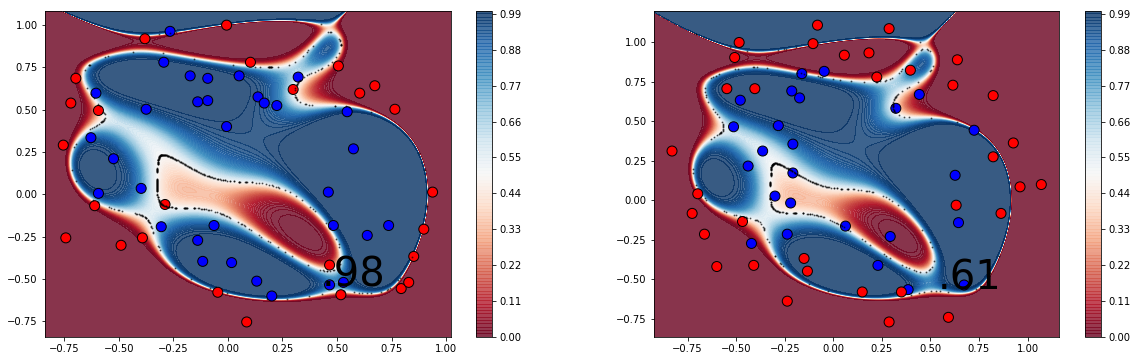

Regresion Logistica Polinomial de orden 13, con lamdba (regularización L2):0


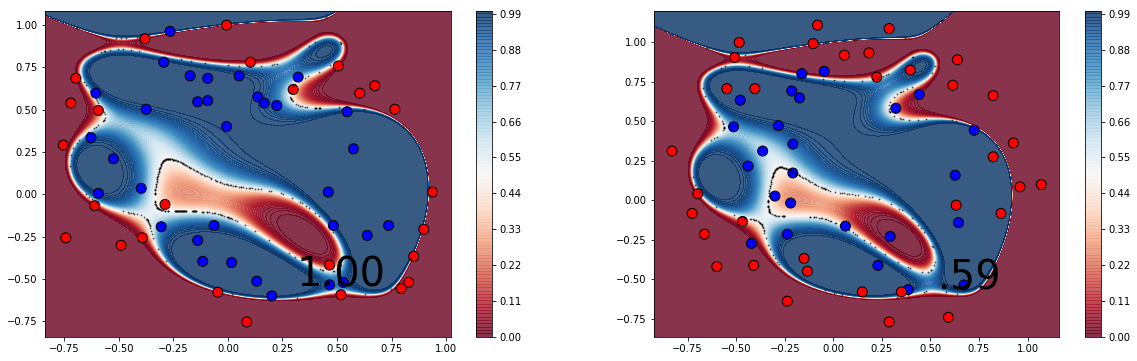

Regresion Logistica Polinomial de orden 14, con lamdba (regularización L2):0


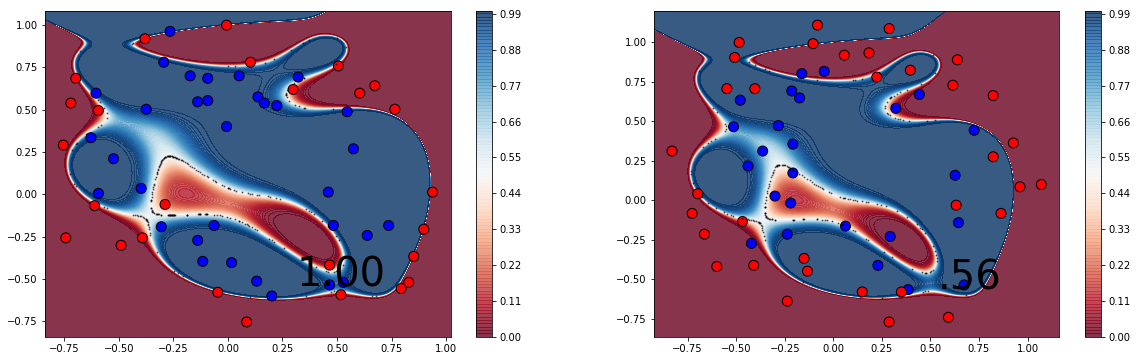

Regresion Logistica Polinomial de orden 15, con lamdba (regularización L2):0


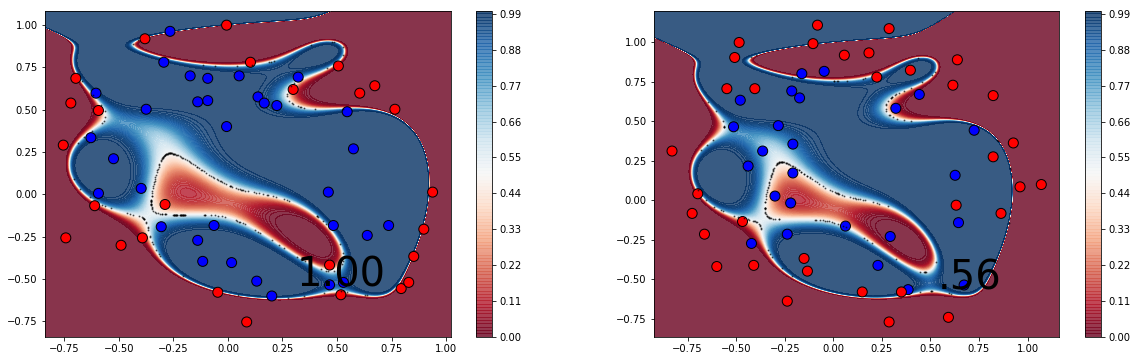

Regresion Logistica Polinomial de orden 16, con lamdba (regularización L2):0


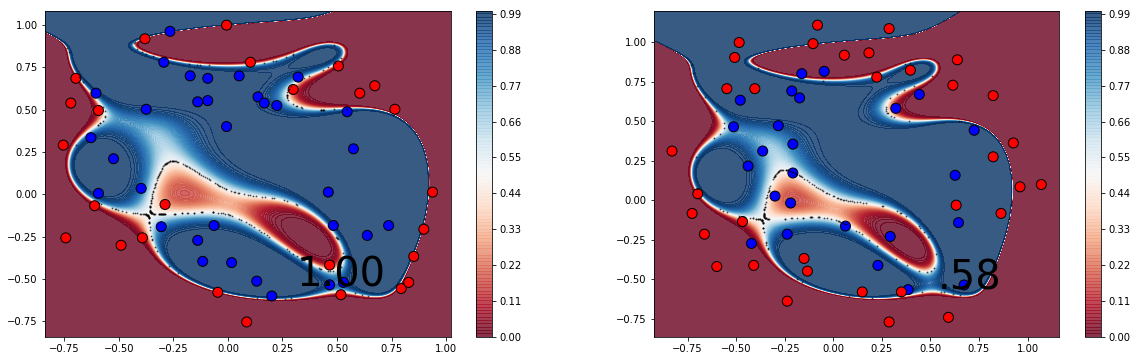

Regresion Logistica Polinomial de orden 17, con lamdba (regularización L2):0


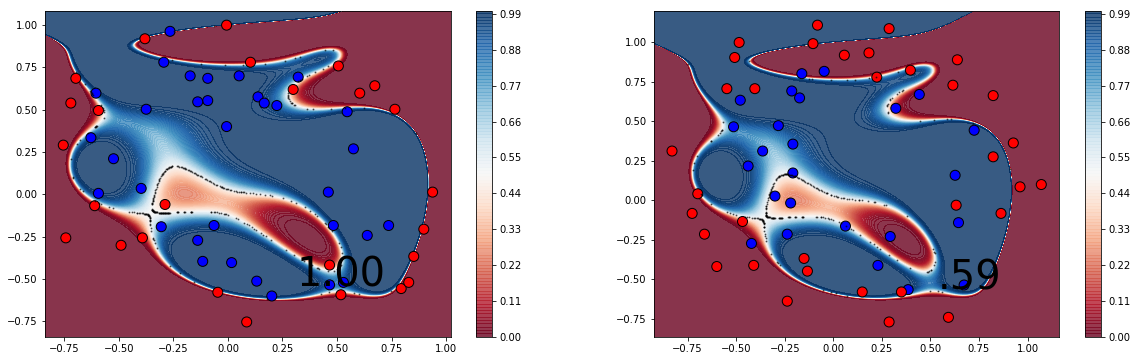

Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


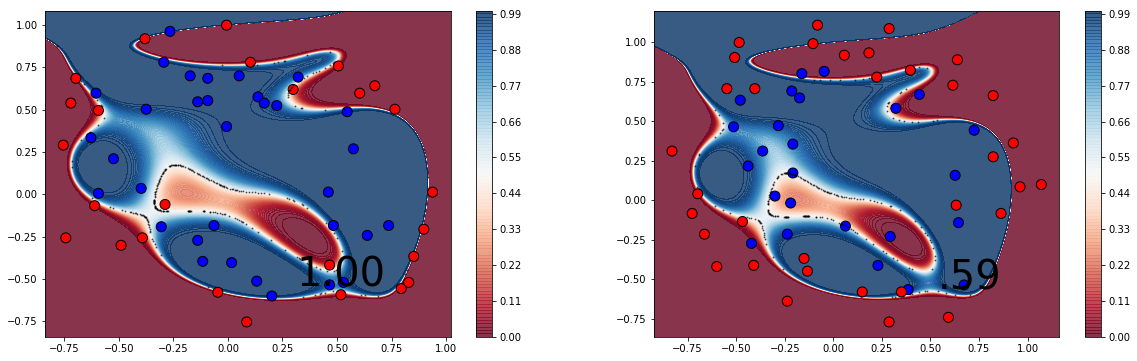

In [134]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0 = test_options(options, plot_it=True)

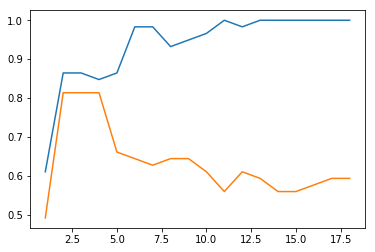

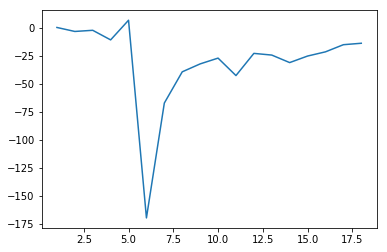

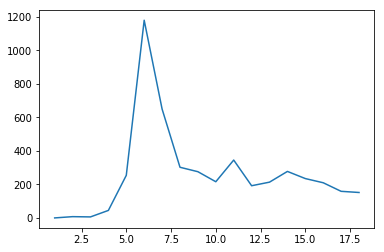

In [136]:
plt.plot(degrees_0, train_acc_array_0)
plt.plot(degrees_0, test_acc_array_0)
plt.show()
plt.plot(degrees_0, coefs_array_mean_0)
plt.show()
plt.plot(degrees_0, coefs_array_std_0)
plt.show()

## 2.2 Variando parametro de reg

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):1e-06


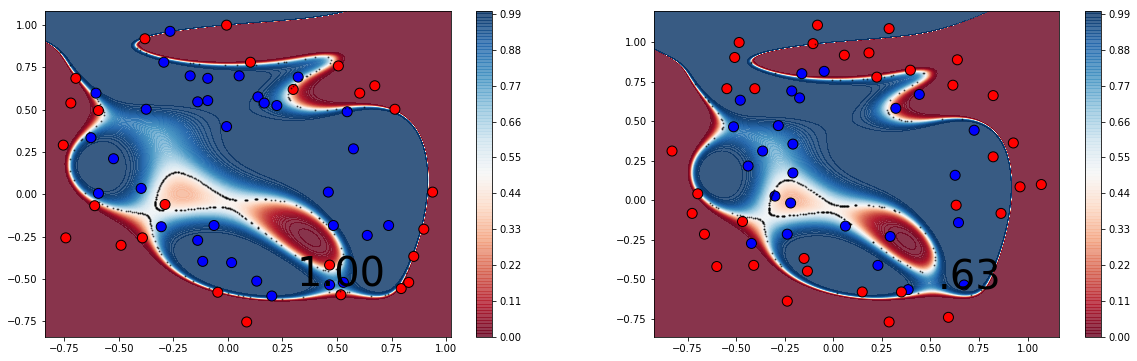

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):0.001


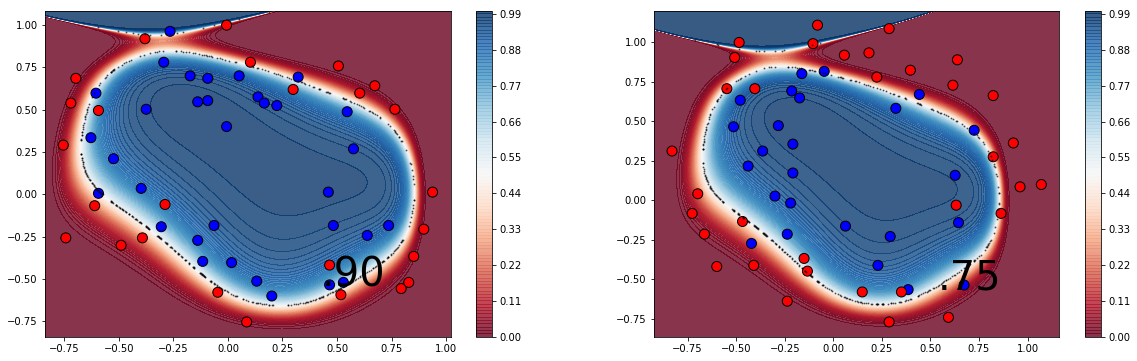

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):0.01


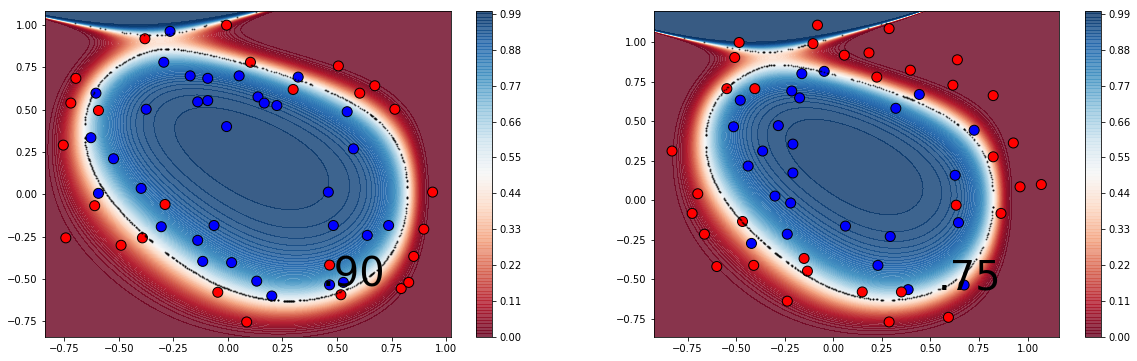

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):0.1


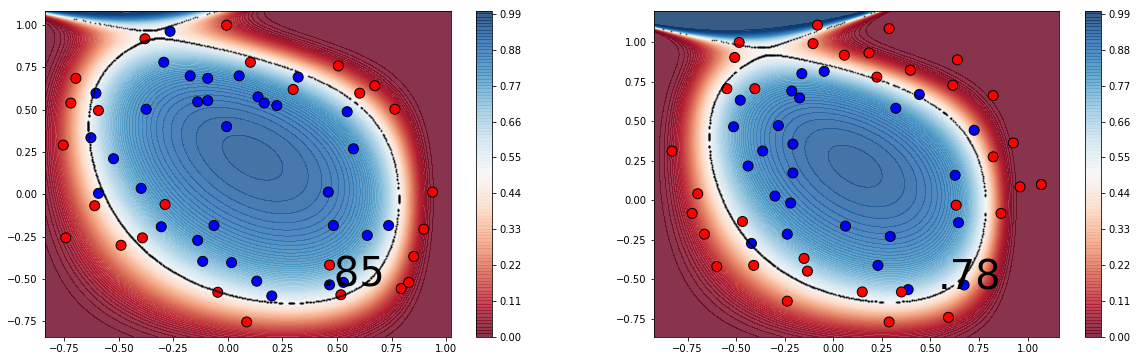

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):0.3


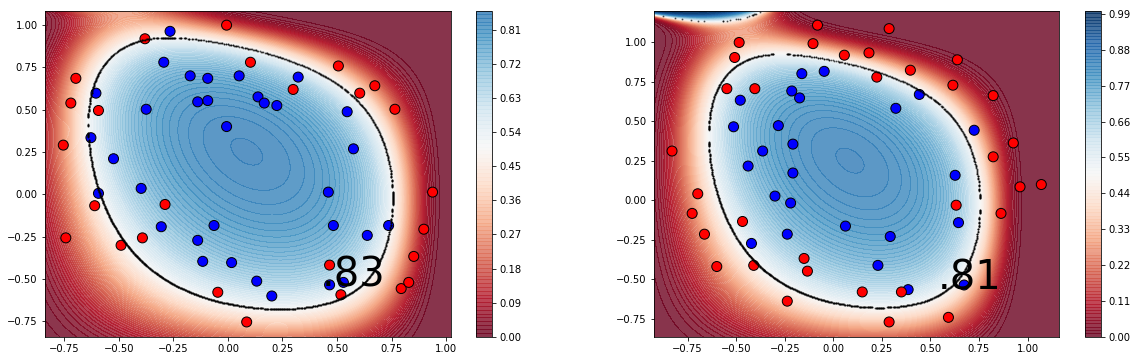

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):0.5


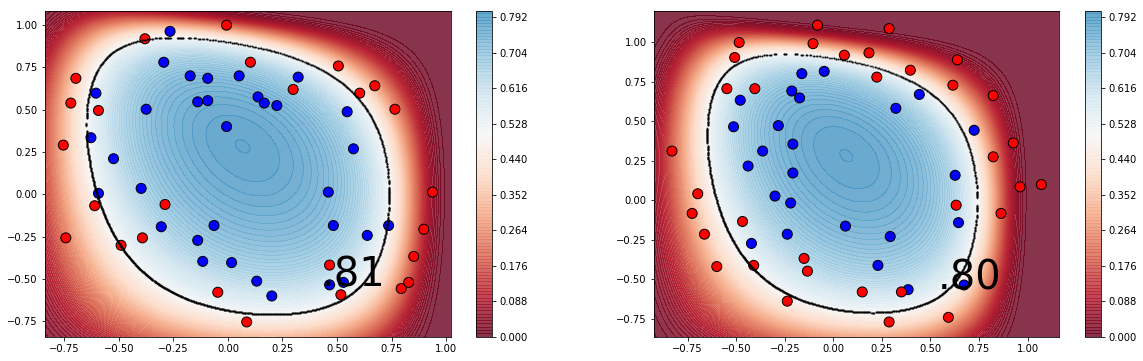

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):1


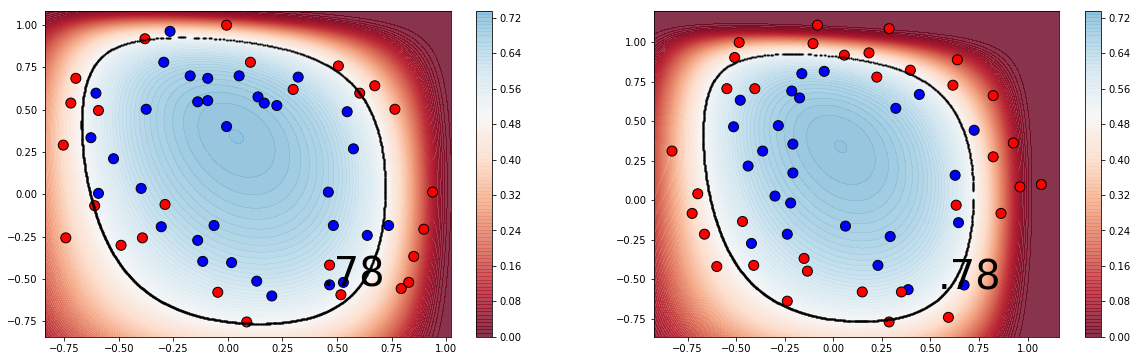

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):2


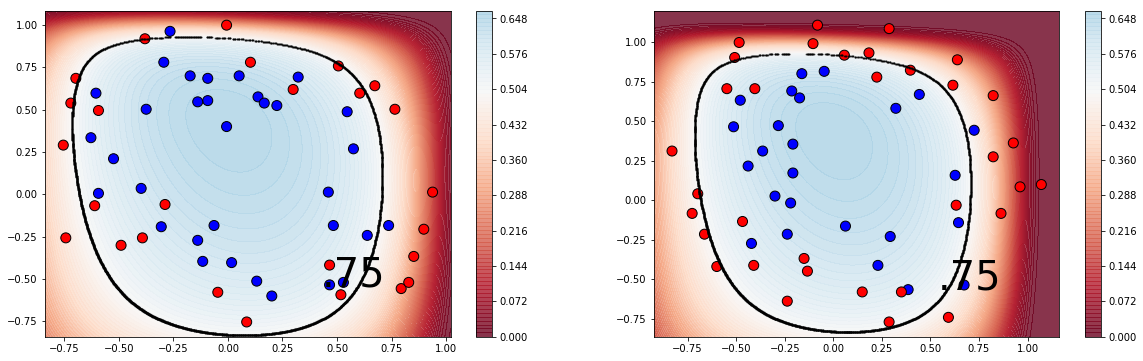

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):5


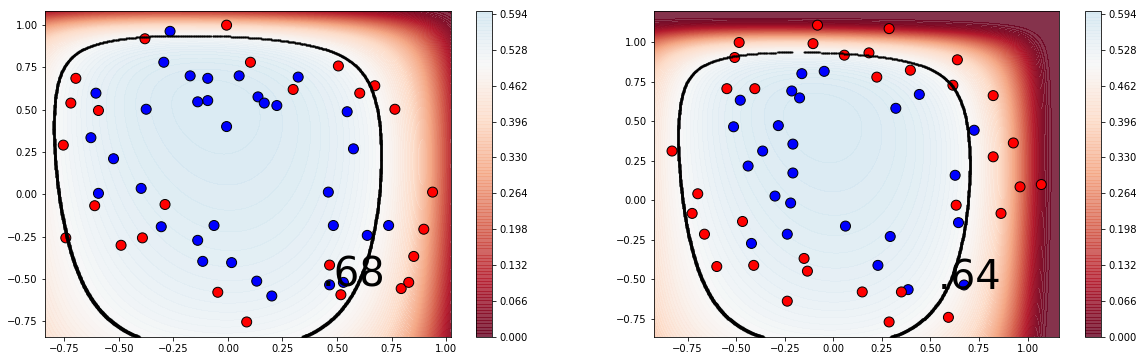

In [121]:
options = [{'degree': 20, 'lambd': 0.000001}, 
           {'degree': 20, 'lambd': 0.001},
           {'degree': 20, 'lambd': 0.01}, 
           {'degree': 20, 'lambd': 0.1}, 
           {'degree': 20, 'lambd': 0.3}, 
           {'degree': 20, 'lambd': 0.5}, 
           {'degree': 20, 'lambd': 1},
           {'degree': 20, 'lambd': 2},
           {'degree': 20, 'lambd': 5},
           ]
degrees, lambdas, train_acc_array, test_acc_array, coefs_array_mean,  coefs_array_std= test_options(options, plot_it=True)

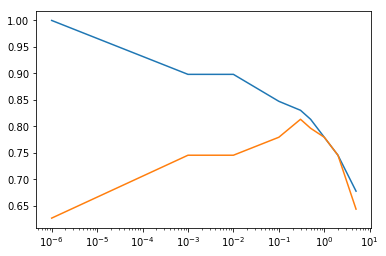

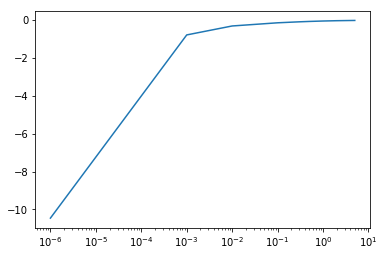

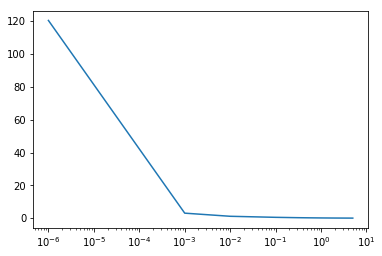

In [122]:
plt.semilogx(lambdas, train_acc_array)
plt.semilogx(lambdas, test_acc_array)
plt.show()
plt.semilogx(lambdas, coefs_array_mean)
plt.show()
plt.semilogx(lambdas, coefs_array_std)
plt.show()

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):10


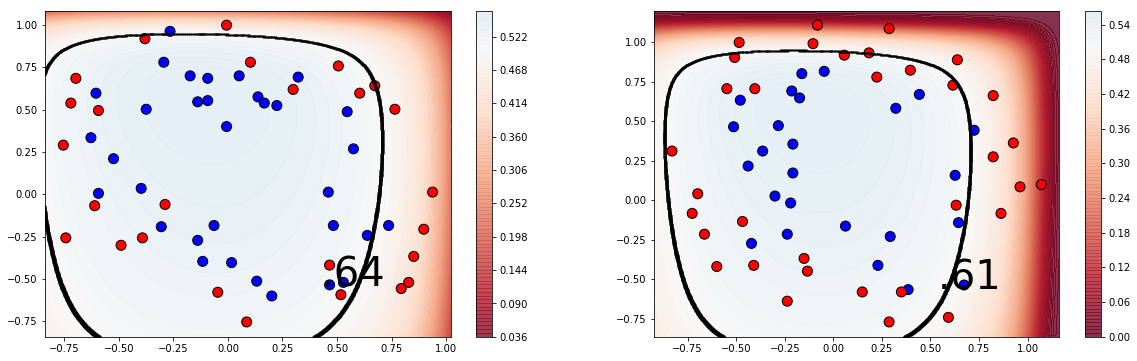

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):20


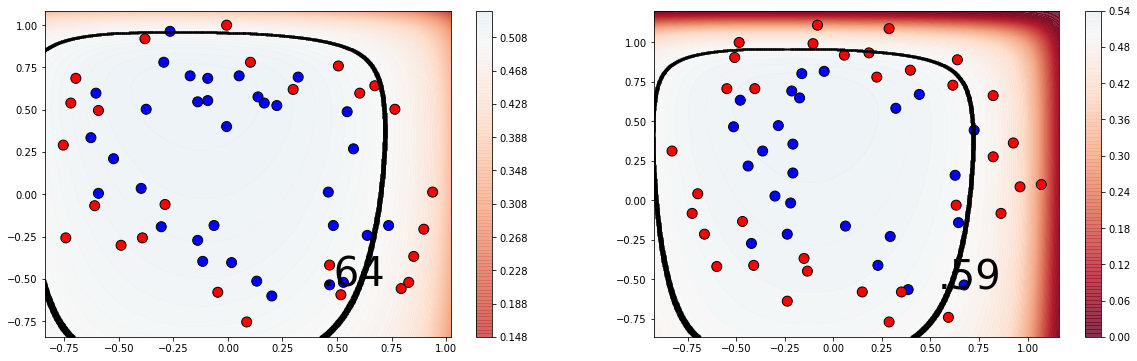

Regresion Logistica Polinomial de orden 20, con lamdba (regularización L2):100


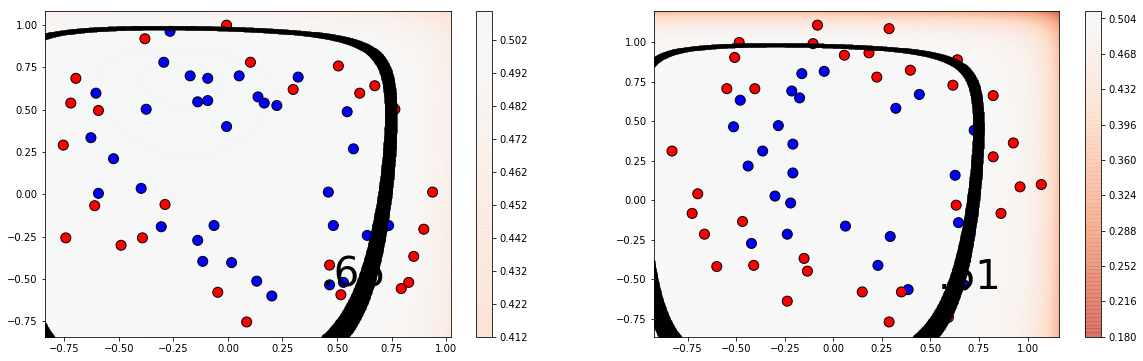

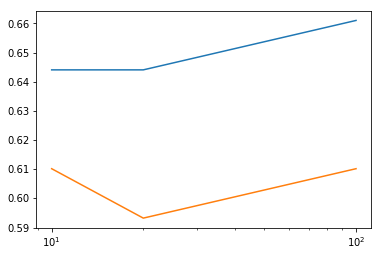

In [70]:
options = [
           {'degree': 20, 'lambd': 10},
           {'degree': 20, 'lambd': 20}, 
           {'degree': 20, 'lambd': 100}, 
           ]
degrees, lambdas, train_acc_array, test_acc_array = test_options(options, plot_it=True)
plt.semilogx(lambdas, train_acc_array)
plt.semilogx(lambdas, test_acc_array)
plt.show()

# Polinomial orden 2 sin productos cruzados

In [77]:
def plot_boundaries_2(X_train, y_train, score, probability_func, degree = None, n_colors = 100, mesh_res = 1000, ax = None):
    X = X_train #np.vstack((X_test, X_train))
    margin_x = (X[:, 0].max() - X[:, 0].min())*0.05
    margin_y = (X[:, 1].max() - X[:, 1].min())*0.05
    x_min, x_max = X[:, 0].min() - margin_x, X[:, 0].max() + margin_x
    y_min, y_max = X[:, 1].min() - margin_y, X[:, 1].max() + margin_y
    hx = (x_max-x_min)/mesh_res
    hy = (y_max-y_min)/mesh_res
    x_domain = np.arange(x_min, x_max, hx)
    y_domain = np.arange(y_min, y_max, hy)
    xx, yy = np.meshgrid(x_domain, y_domain)

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if degree is not None:
        polynomial_set = get_polynimial_set_2(np.c_[xx.ravel(), yy.ravel()], degree = degree)
        Z = probability_func(polynomial_set)[:, 1]
    else:
        Z_aux = probability_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z_aux[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, n_colors, vmin=0., vmax=1., cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100, marker='o')
    
    boundary_line = np.where(np.abs(Z-0.5)<0.001)
    
    ax.scatter(x_domain[boundary_line[1]], y_domain[boundary_line[0]], color='k', alpha=0.5, s=1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    
import math
def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

def get_polynimial_set_2(X, degree = 12):
    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones 
    # De los productos del grado indicado en degree
    k = 2
    n = degree + k
    pos = 0
    X_mat = np.zeros((X.shape[0], nCr(n,k) - 1))
    for i in range(degree + 1):
        for j in range(i+1):
            if not ((i-j)==1 and j==1):
                X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j
                pos = pos + 1
                # print(i, j)
    return X_mat

In [78]:
X_train_degree = get_polynimial_set_2(X_train, degree=degree)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):1


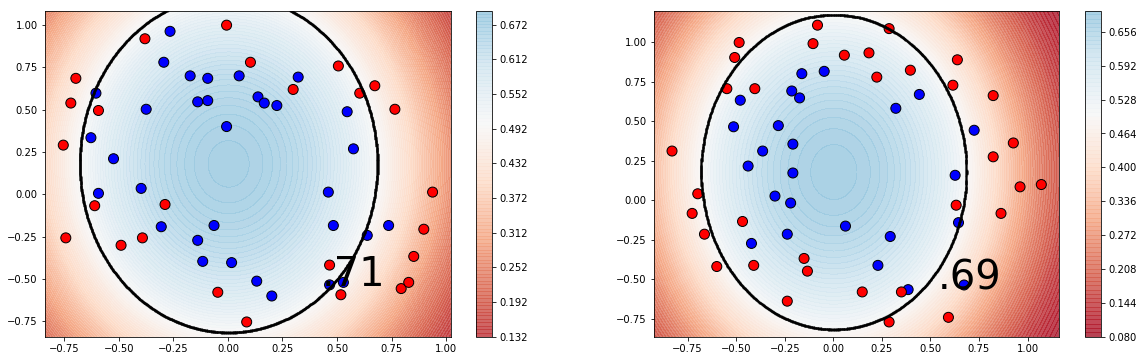

Train Accuracy (Exactitud): 0.71186440678
Test Accuracy (Exactitud): 0.694915254237


In [101]:
from matplotlib.colors import ListedColormap
degree = 2
lambd = 1 # probar distintos valores de lambda
plot_it = True
print_it = True
X_train_degree = get_polynimial_set_2(X_train, degree=degree)
X_test_degree = get_polynimial_set_2(X_test, degree=degree)
# Defino el modelo de clasificación como Regresion Logistica
if lambd == 0:
    C1 = 10000000000
else:
    C1 = 1/lambd 
#C2 = 1
clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

# Entreno el modelo con el dataset de entrenamiento
clf_logist_pol.fit(X_train_degree, y_train)

# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist_pol = clf_logist_pol.score(X_test_degree, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist_pol = clf_logist_pol.score(X_train_degree, y_train)

# print('Test Accuracy (Exactitud):',score_test_logist_pol)
# print('Train Accuracy (Exactitud):',score_train_logist_pol)
# print('coeficientes:', clf_logist_pol.coef_)
# print('intercept:', clf_logist_pol.intercept_)
if plot_it:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    plot_boundaries_2(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1)
    plot_boundaries_2(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2)
    print('Regresion Logistica Polinomial de orden '+str(degree) +', con lamdba (regularización L2):' +  str(lambd))
    plt.show()
if print_it:
    print('Train Accuracy (Exactitud):',score_train_logist_pol)
    print('Test Accuracy (Exactitud):',score_test_logist_pol)